In [1]:
#https://github.com/OceanParcels/GlobalMassBudget/blob/main/create_population_input.py

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import timeit
import matplotlib.colors
import csv
import shapefile
import cartopy

In [2]:
import requests
import pandas as pd
import urllib.request as urlr

## Jambeck data download

In [3]:
url = "https://www.science.org/doi/suppl/10.1126/science.1260352/suppl_file/1260352_supportingfile_suppl._excel_seq1_v1.xlsx"
url_backup = "http://jambeck.engr.uga.edu/wp-content/uploads/2015/01/JambeckSData.xlsx" ## This seems like the one that works, but I don't like the idea of hardcoding to this. does Science have an API we can use?

In [4]:
response = requests.get(url_backup, stream=True)
response.headers

{'Date': 'Tue, 16 Jan 2024 04:29:17 GMT', 'Server': 'Apache', 'Last-Modified': 'Fri, 30 Jan 2015 16:55:13 GMT', 'Accept-Ranges': 'bytes', 'Content-Length': '46718', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Content-Type': 'application/vnd.openxmlformats-officedocument.spreadsheetml.sheet'}

In [5]:
response.ok

True

In [6]:
try:
    socket = urlr.urlopen(url)
except:
    print('Using backup')
    socket = urlr.urlopen(url_backup)
xd = pd.ExcelFile(socket.read())
xd.sheet_names

Using backup


['Jambeck et al. (2014)']

In [7]:
df = pd.read_excel(xd,'Jambeck et al. (2014)')

/Users/denes001/anaconda3/envs/py3_parcels/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [8]:
df

,Country,Economic status1,Coastal population2,Waste generation rate [kg/person/day]3,% Plastic in waste stream4,% Inadequately managed waste5,% Littered waste6,Waste generation [kg/day]7,Plastic waste generation [kg/day]7,Inadequately managed plastic waste [kg/day]7,Plastic waste littered\n [kg/day]7,Mismanaged plastic waste [kg/person/day]7,Mismanaged plastic waste in 2010\n [tonnes]7,Mismanaged plastic waste in 2025\n [tonnes]7
0,Albania,LMI,2530533.0,0.77,8.95,44.667603,2.0,1948510.41,1.743917e+05,7.789658e+04,3487.833634,0.032161,29705.312580,6.305075e+04
1,Algeria8,UMI,16556580.0,1.20,11.95,58.069448,2.0,19867896.00,2.374214e+06,1.378693e+06,47484.271440,0.08614,520554.599404,1.017444e+06
2,Angola,LMI,3790041.0,0.48,12.95,70.715014,2.0,1819219.68,2.355889e+05,1.665968e+05,4711.778971,0.0452,62527.616065,1.367695e+05
3,Anguilla,HIC,14561.0,2.10,11.95,1.869023,2.0,30578.10,3.654083e+03,6.829564e+01,73.081659,0.009709,51.602714,7.294925e+01
4,Antigua & Barbuda,HIC,66843.0,5.50,11.95,5.816355,2.0,367636.50,4.393256e+04,2.555274e+03,878.651235,0.051373,1253.382652,1.385281e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,NaN,4 - Bold data were taken directly from World B...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,NaN,5 - Using a model developed for this study (se...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,NaN,6 - From U.S. national litter study22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,NaN,7 - Calculated values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df[['Country','Mismanaged plastic waste [kg/person/day]7']]

,Country,Mismanaged plastic waste [kg/person/day]7
0,Albania,0.032161
1,Algeria8,0.08614
2,Angola,0.0452
3,Anguilla,0.009709
4,Antigua & Barbuda,0.051373
...,...,...
197,NaN,NaN
198,NaN,NaN
199,NaN,NaN
200,NaN,NaN


## GPW data
- if using WPP-adjusted: https://beta.sedac.ciesin.columbia.edu/data/set/gpw-v4-population-density-adjusted-to-2015-unwpp-country-totals-rev11/data-download
- if using non-WPP-adjusted: https://beta.sedac.ciesin.columbia.edu/data/set/gpw-v4-population-density-rev11/data-download

select 'All Years Combined' > 'NetCDF' > '2.5 Minute (approx. 5km)'

In [10]:
gpw = xr.open_dataset('../../data/release/GPWv4/gpw-v4-population-density-rev11_totpop_2pt5_min_nc/gpw_v4_population_density_rev11_2pt5_min.nc')

In [11]:
gpw

<xarray.Dataset>
Dimensions:                                                                    (
                                                                                longitude: 8640,
                                                                                latitude: 4320,
                                                                                raster: 20)
Coordinates:
  * longitude                                                                  (longitude) float64 ...
  * latitude                                                                   (latitude) float64 ...
  * raster                                                                     (raster) int32 ...
Data variables:
    Population Density, v4.11 (2000, 2005, 2010, 2015, 2020): 2.5 arc-minutes  (raster, latitude, longitude) float32 ...
Attributes:
    proj4:        +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0...
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 2.8-4)
    date:         2018-11-16 10:27:52

In [12]:
gpw['longitude']


<xarray.DataArray 'longitude' (longitude: 8640)>
array([-179.979167, -179.9375  , -179.895833, ...,  179.895833,  179.9375  ,
        179.979167])
Coordinates:
  * longitude  (longitude) float64 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Attributes:
    units:      degrees_east
    long_name:  longitude

In [13]:
gpw['latitude']

<xarray.DataArray 'latitude' (latitude: 4320)>
array([ 89.979167,  89.9375  ,  89.895833, ..., -89.895833, -89.9375  ,
       -89.979167])
Coordinates:
  * latitude  (latitude) float64 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
Attributes:
    units:      degrees_north
    long_name:  latitude

In [14]:
lons_data = gpw.variables['longitude'][:]
lats_data = gpw.variables['latitude'][:]
meshPop_x, meshPop_y = np.meshgrid(lons_data,lats_data)

In [15]:
densityPop = gpw.variables['Population Density, v4.11 (2000, 2005, 2010, 2015, 2020): 2.5 arc-minutes']


In [16]:
lats_data

<xarray.IndexVariable 'latitude' (latitude: 4320)>
array([ 89.979167,  89.9375  ,  89.895833, ..., -89.895833, -89.9375  ,
       -89.979167])
Attributes:
    units:      degrees_north
    long_name:  latitude

In [17]:
import shapely
import cartopy.io.shapereader as shpreader

In [18]:
shpfilename = shpreader.natural_earth(resolution='50m',
                                      category='cultural',
                                      name='admin_0_countries')

In [19]:
shpfilename

'/Users/denes001/.local/share/cartopy/shapefiles/natural_earth/cultural/ne_50m_admin_0_countries.shp'

In [36]:
reader = shpreader.Reader(shpfilename)
countries = reader.records()

In [21]:
all_country_names = list(df['Country'])

all_country_names = [str(country_name).replace('&', 'and') for country_name in all_country_names]


from functools import reduce
 
def remove_digits(lst):
    return [reduce(lambda x, y: x+y, filter(lambda x: not x.isdigit(), s), '') for s in lst]


all_country_names = remove_digits(all_country_names) # annoyingly there are some footnotes attached to the country names
while 'nan' in all_country_names:
    all_country_names.remove('nan')
 

In [22]:
all_country_names

['Albania',
 'Algeria',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Aruba',
 'Australia',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bosnia and Herzegovina',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burma/Myanmar',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Channel Islands',
 'Chile',
 'China',
 'Christmas Island',
 'Cocos Islands',
 'Colombia',
 'Comoros',
 'Congo Rep of',
 'Congo, Dem rep. of',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Denmark',
 'Dhekelia',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Falkland Islands',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'French Polynesia',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Grenada',

In [23]:
def list_contains_string(string_,list_):
    result = False
    for element in list_:
        if string_ in element:
            result = True
    return result

def list_contains_string_index(string1,string2,list_):
    result = None
    for i1,element in enumerate(list_):
        if string1 in element or string2 in element:
            result = i1
    return result   

In [24]:
country_names = []
country_names_2 = []

In [25]:
'Tuvalu' in all_country_names

True

In [26]:
for country in countries:

    country_name = country.attributes['NAME_LONG']
    country_name_2 = country.attributes['NAME']
    
    geom = country.geometry
    if country_name_2 in all_country_names or country_name in all_country_names:
       
        country_names.append(country_name)
        country_names_2.append(country_name_2)

        mpw = np.nan
        
        i1 = list_contains_string_index(country_name,country_name_2,all_country_names)
        country_mpw = df.loc[i1,'Country']
        mpw = df.iloc[i1,6]
    else:
        print(country_name, country_name_2)

Zimbabwe Zimbabwe
Zambia Zambia
Vatican Vatican
Uzbekistan Uzbekistan
United States Virgin Islands U.S. Virgin Is.
American Samoa American Samoa
South Georgia and the Islands S. Geo. and the Is.
British Indian Ocean Territory Br. Indian Ocean Ter.
Pitcairn Islands Pitcairn Is.
Falkland Islands / Malvinas Falkland Is.
Uganda Uganda
Turkmenistan Turkmenistan
Timor-Leste Timor-Leste
Tajikistan Tajikistan
Switzerland Switzerland
Kingdom of eSwatini eSwatini
South Sudan S. Sudan
Republic of Korea South Korea
Somaliland Somaliland
Slovakia Slovakia
Serbia Serbia
São Tomé and Principe São Tomé and Principe
San Marino San Marino
Rwanda Rwanda
Paraguay Paraguay
Dem. Rep. Korea North Korea
Niger Niger
Curaçao Curaçao
Nepal Nepal
Western Sahara W. Sahara
Mongolia Mongolia
Moldova Moldova
Mali Mali
Malawi Malawi
North Macedonia North Macedonia
Luxembourg Luxembourg
Liechtenstein Liechtenstein
Lesotho Lesotho
Lao PDR Laos
Kyrgyzstan Kyrgyzstan
Kosovo Kosovo
Kazakhstan Kazakhstan
Palestine Palestine

In [ ]:
len(country_names), len(all_country_names), len(country_names_2)


In [ ]:
np.sort(all_country_names)

In [ ]:
np.setdiff1d(np.stack((country_names, country_names_2)), all_country_names)

In [ ]:
np.setdiff1d(all_country_names, np.stack((country_names, country_names_2)))

In [38]:
reader = shpreader.Reader(shpfilename)
countries = reader.records()
continent = []
region_un = []
subregion = []
region_wb = []

for country in countries:
    continent.append(country.attributes['CONTINENT'])
    region_un.append(country.attributes['REGION_UN'])
    subregion.append(country.attributes['SUBREGION'])
    region_wb.append(country.attributes['REGION_WB'])

In [41]:
np.unique(continent, return_counts=True)

(array(['Africa', 'Antarctica', 'Asia', 'Europe', 'North America',
        'Oceania', 'Seven seas (open ocean)', 'South America'],
       dtype='<U23'),
 array([54,  1, 53, 50, 38, 25,  8, 13]))

In [42]:
np.unique(region_un, return_counts=True)

(array(['Africa', 'Americas', 'Antarctica', 'Asia', 'Europe', 'Oceania'],
       dtype='<U10'),
 array([61, 52,  1, 53, 50, 25]))

In [44]:
np.unique(subregion, return_counts=True)

(array(['Antarctica', 'Australia and New Zealand', 'Caribbean',
        'Central America', 'Central Asia', 'Eastern Africa',
        'Eastern Asia', 'Eastern Europe', 'Melanesia', 'Micronesia',
        'Middle Africa', 'Northern Africa', 'Northern America',
        'Northern Europe', 'Polynesia', 'Seven seas (open ocean)',
        'South America', 'South-Eastern Asia', 'Southern Africa',
        'Southern Asia', 'Southern Europe', 'Western Africa',
        'Western Asia', 'Western Europe'], dtype='<U25'),
 array([ 1,  4, 25,  8,  5, 19,  8, 10,  5,  7,  9,  7,  5, 15,  9,  5, 13,
        11,  5, 10, 16, 17, 19,  9]))

In [43]:
np.unique(region_wb, return_counts=True)

(array(['Antarctica', 'East Asia & Pacific', 'Europe & Central Asia',
        'Latin America & Caribbean', 'Middle East & North Africa',
        'North America', 'South Asia', 'Sub-Saharan Africa'], dtype='<U26'),
 array([ 2, 45, 61, 46, 22,  4,  9, 53]))

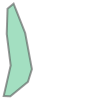

In [46]:
country.geometry

## Playing with gpw data:

In [56]:
densityPop = gpw.variables['Population Density, v4.11 (2000, 2005, 2010, 2015, 2020): 2.5 arc-minutes']
lons_data = gpw.variables['longitude'][:]
lats_data = gpw.variables['latitude'][:]
meshPop_x, meshPop_y = np.meshgrid(lons_data,lats_data)

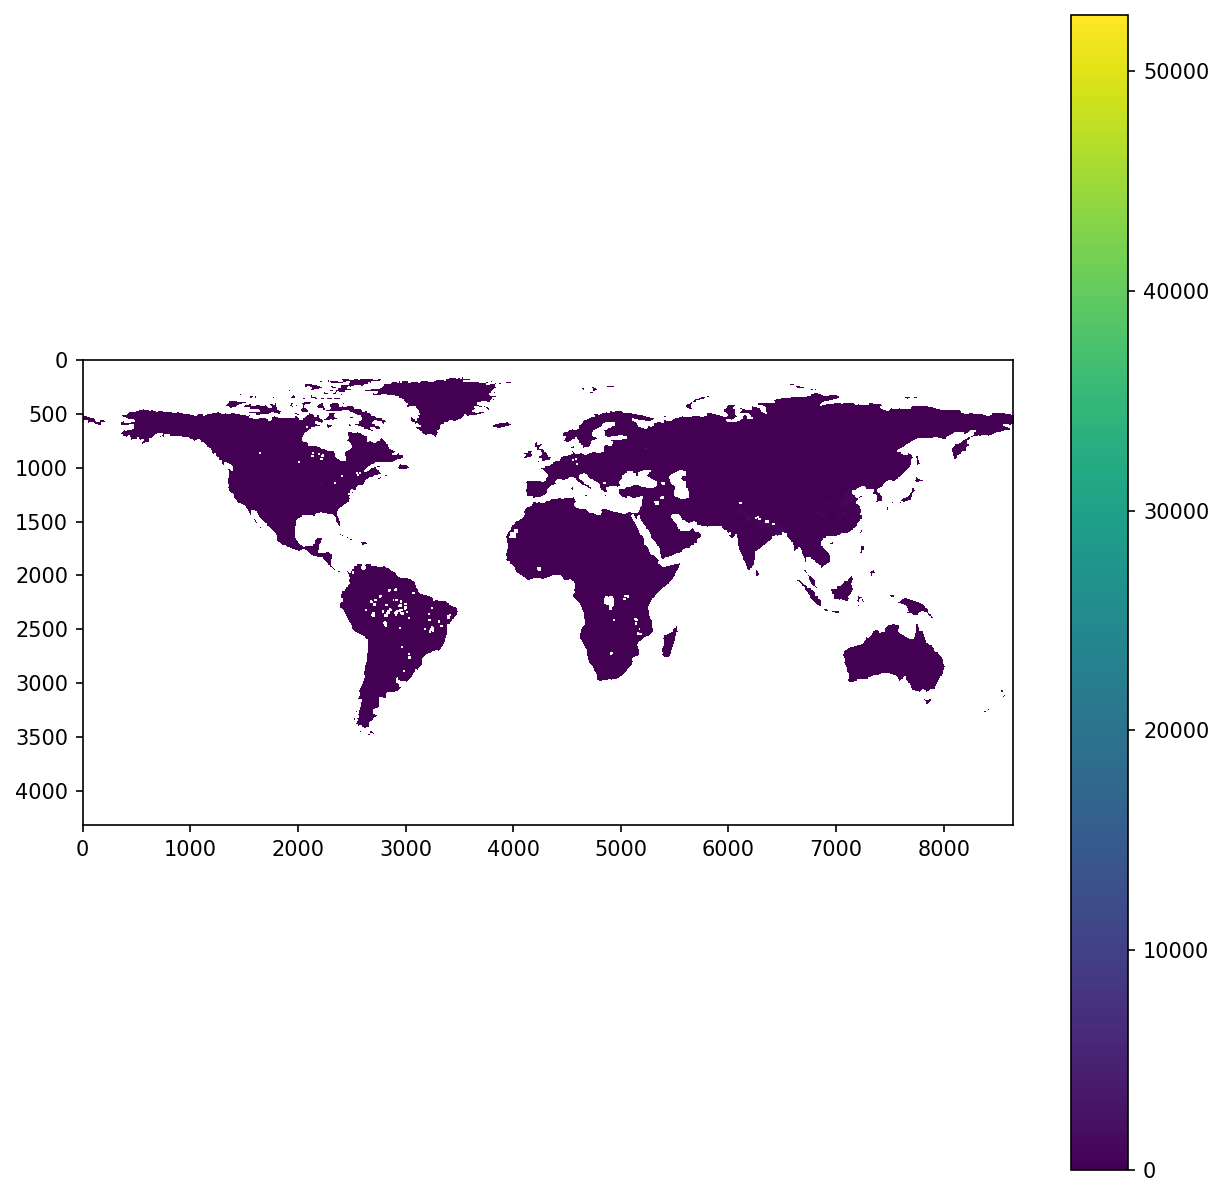

In [65]:
plt.figure(figsize=(10,10), dpi=150)
plt.imshow(gpw['Population Density, v4.11 (2000, 2005, 2010, 2015, 2020): 2.5 arc-minutes'].data[0,:,:])
plt.colorbar()
plt.show()

In [62]:
gpw['Population Density, v4.11 (2000, 2005, 2010, 2015, 2020): 2.5 arc-minutes'].data[0,:,:].sha

(4320, 8640)

In [144]:
data_mask_coast = xr.open_dataset('../../data/output_data/masks/mask_coast_NEMO0083.nc')
mask_coast = data_mask_coast['mask_coast'].values

lons = data_mask_coast['lon']
lats = data_mask_coast['lat']


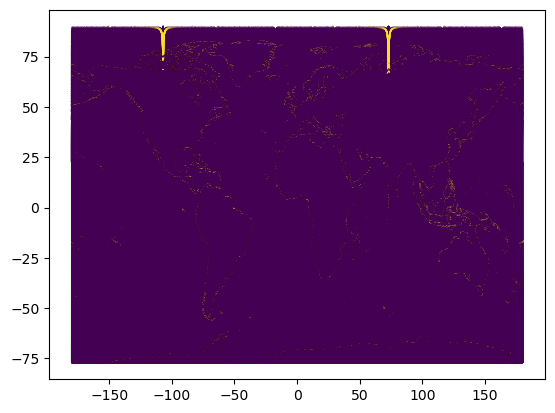

In [145]:
plt.scatter(data_mask_coast['lon'].values, data_mask_coast['lat'].values, c=data_mask_coast['mask_coast'].values.flatten(), s=0.01)
plt.show()

In [146]:
lats_coast = data_mask_coast['lat'].data[np.where(data_mask_coast['mask_coast'])]
lons_coast = data_mask_coast['lon'].data[np.where(data_mask_coast['mask_coast'])]

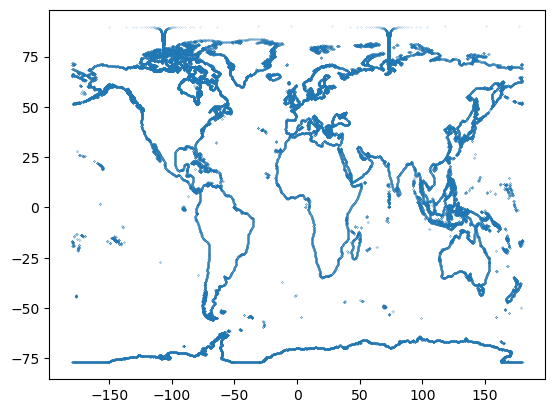

In [142]:
plt.scatter(lons_coast, lats_coast, s=0.01)

In [128]:
lons_coast

array([1083, 1084, 1085, ..., 3803, 3804, 3805])

In [163]:
# Assign
distance_threshhold = 10 #km

In [158]:
reader = shpreader.Reader(shpfilename)
countries = reader.records()
continent = []
region_un = []
subregion = []
region_wb = []

for country in countries:
    # Get country information
    continent = country.attributes['CONTINENT']
    region_un = country.attributes['REGION_UN']
    subregion = country.attributes['SUBREGION']
    country_name = country.attributes['NAME_LONG']
    country_lons, country_lats = country.geometry.exterior.coords.xy

    # Loop through country points to find coastal points within [specified] km
    number_country_points = len(country_lons)
    for i in range(number_country_points):
        point = (country_lats[i], country_lons[i])




In [165]:
import geopy.distance

point = (-33.666526, 151.320409)

coastal_indices = []
for j in range(len(lons_coast)):
    distance = geopy.distance.GeodesicDistance(point, (lats_coast[j], lons_coast[j])).km
    if distance <= distance_threshhold:
        coastal_indices.append(j)



In [166]:
coastal_indices

[13373, 13394]

In [1]:
plt.scatter(lons_coast, lats_coast, s=0.01)
plt.scatter(lons_coast[coastal_indices], lats_coast[coastal_indices], s=2, c='r')

NameError: name 'plt' is not defined